In [47]:
import pandas_datareader as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt


In [48]:
# Portfolio Of Stocks & the corresponding stocks in the portfolio
tickers = ['RAJESHEXPO.NS']
stocks = [1]

In [49]:
# Download closing prices
df=pd.DataFrame()
for i in tickers:
  tick=yf.Ticker(i)
  old  = tick.history(start="2023-01-01",  end=dt.now())['Close']
  new=pd.DataFrame(old)
  df[i]=new

In [50]:
#Calculate the initial invested value(Assuming investment is made today)
initial_investment= stocks*df.iloc[-1,:]

In [51]:
#Calculate returns
returns=df.pct_change()

In [52]:
#Extract the correlation matrix 
corr_matrix = returns.corr()

In [53]:
#Get the standard deviation of returns
st_dev=returns.std()

In [54]:
#Declare the confidence and Total Value-at-Risk variables
conf=[]
tot_vaRlist=[]

In [55]:
#Run the simulation for calculating VaR for different confidence intervals
for i in range(0,2500):
  conf+=[75+i/100]
  vaR=st.norm.ppf(conf[i]/100)*st_dev*initial_investment*-1
  vaRlist=np.array(vaR)
  tot_vaR_sq=np.matmul( np.matmul(vaRlist,corr_matrix.to_numpy()) , np.transpose(vaRlist))
  tot_vaR=np.sqrt(tot_vaR_sq)
  tot_vaRlist+=[tot_vaR]

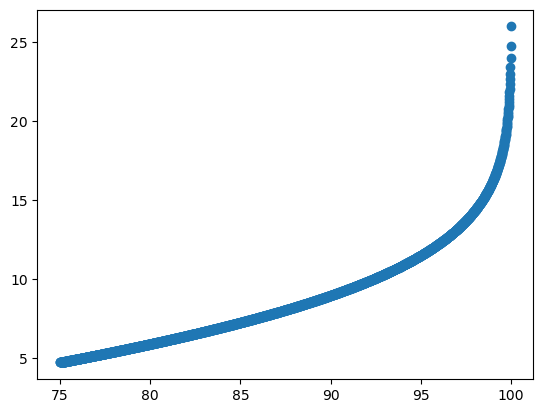

In [56]:
#Plot the VaR against the different confidence intervals
plt.scatter(conf, tot_vaRlist)
plt.show()